In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, laplace, normaltest

In [6]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'NVDA', 'JPM', 'V', 'PG', 'TSLA']
years = 2
fetch_period = f"{years}y"

data = yf.download(tickers, period=fetch_period)['Close']

log_returns = np.log(data / data.shift(1)).dropna()

[*********************100%***********************]  10 of 10 completed


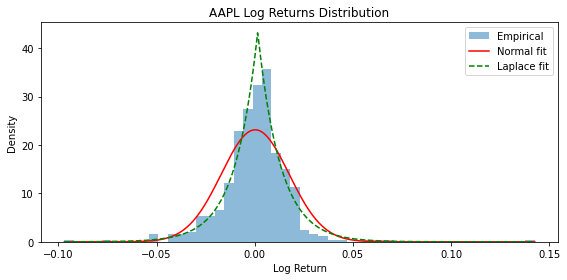

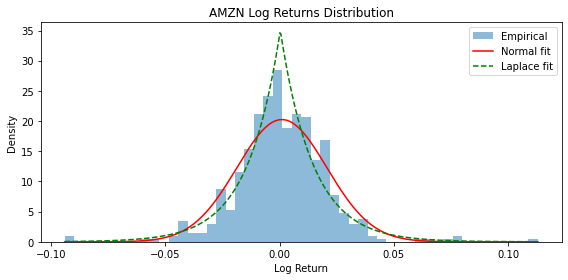

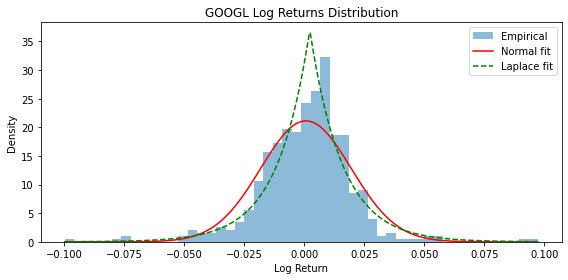

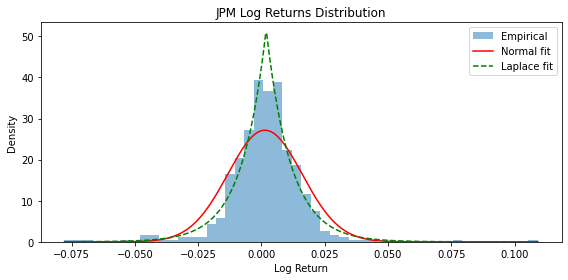

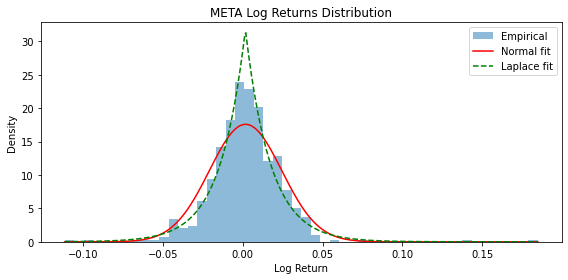

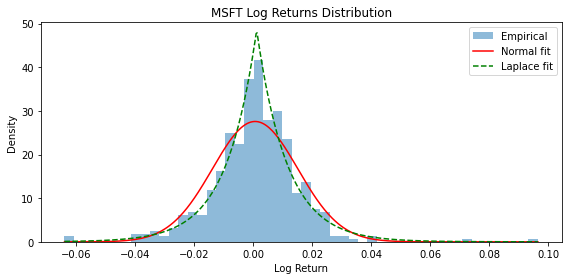

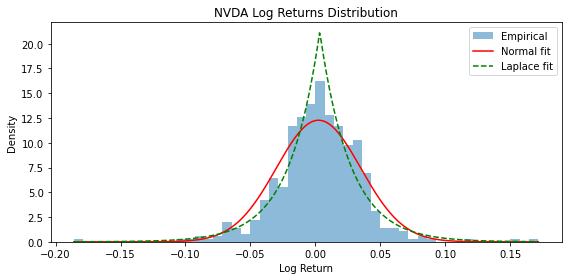

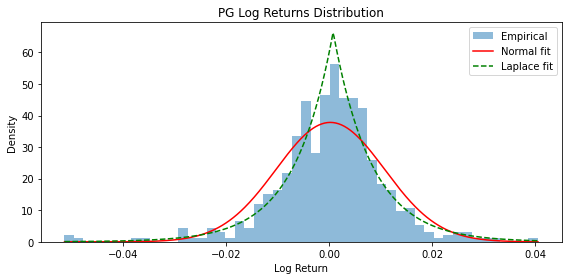

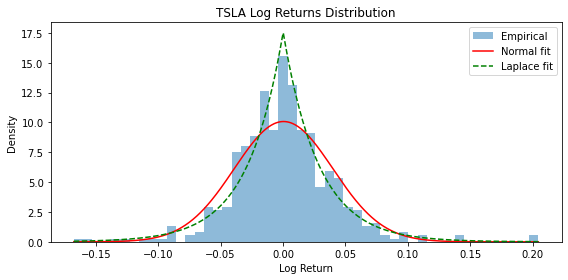

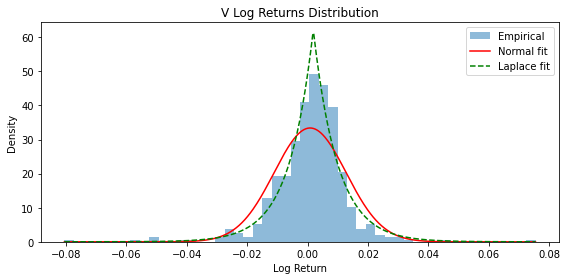

In [7]:
# Dictionary to store results
distribution_fit_results = {}

for ticker in log_returns.columns:
    data = log_returns[ticker].dropna()
    
    # Fit Normal and Laplace
    mu_norm, std_norm = norm.fit(data)
    loc_lap, scale_lap = laplace.fit(data)
    
    # Test normality
    stat, p_norm = normaltest(data)
    
    # Store results
    distribution_fit_results[ticker] = {
        "normal_params": (mu_norm, std_norm),
        "laplace_params": (loc_lap, scale_lap),
        "normality_p": p_norm
    }
    
    # Plot histogram and PDFs
    x = np.linspace(data.min(), data.max(), 500)
    plt.figure(figsize=(8, 4))
    plt.hist(data, bins=50, density=True, alpha=0.5, label='Empirical')
    plt.plot(x, norm.pdf(x, mu_norm, std_norm), 'r-', label='Normal fit')
    plt.plot(x, laplace.pdf(x, loc_lap, scale_lap), 'g--', label='Laplace fit')
    plt.title(f"{ticker} Log Returns Distribution")
    plt.xlabel("Log Return")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()